In [18]:
import pandas as pd

In [19]:
df=pd.read_csv("Mall_Customers.csv")

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df=df.drop("Gender",axis=1)

In [26]:
df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"SS"},inplace=True)

In [27]:
df.head()

,CustomerID,Age,Income,SS
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


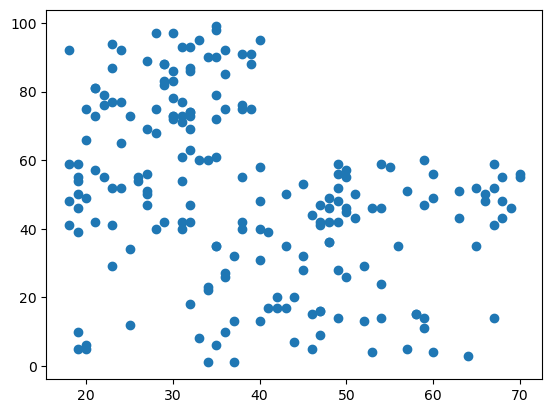

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df["Age"],df["SS"])

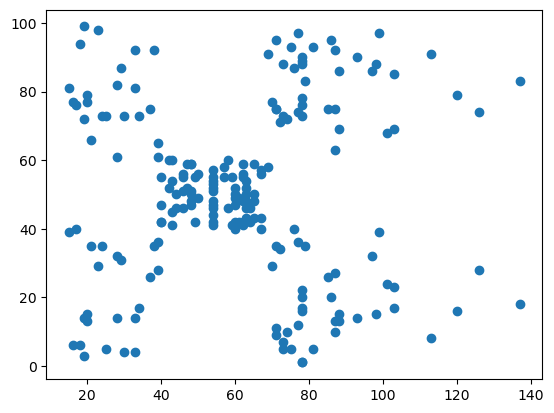

In [30]:
plt.scatter(df["Income"],df["SS"])

In [36]:
import numpy as np
from scipy.spatial import distance
def kmeans(x,k=4,max_iterations=50):
    if isinstance(x,pd.DataFrame):
        x=x.value
    idx=np.random.choice(len(x),k,replace=False)
    centroids=x[idx,:]
    p=np.argmin(distance.cdist(x,centroids,'euclidean'),axis=1)

    for j in range(max_iterations):
        centroid=np.vstack([x[p==i,:].mean(axis=0) for i in range(k)])
        tmp=np.argmin(distance.cdist(x,centroids,'euclidean'),axis=1)
        if np.array_equal(p,tmp): break
        
    return p

In [37]:
from sklearn.preprocessing import StandardScaler

scl=StandardScaler()

In [38]:
x=df.values
x=scl.fit_transform(x)

In [39]:
P=kmeans(x)

In [40]:
assert len(df)==len(P)

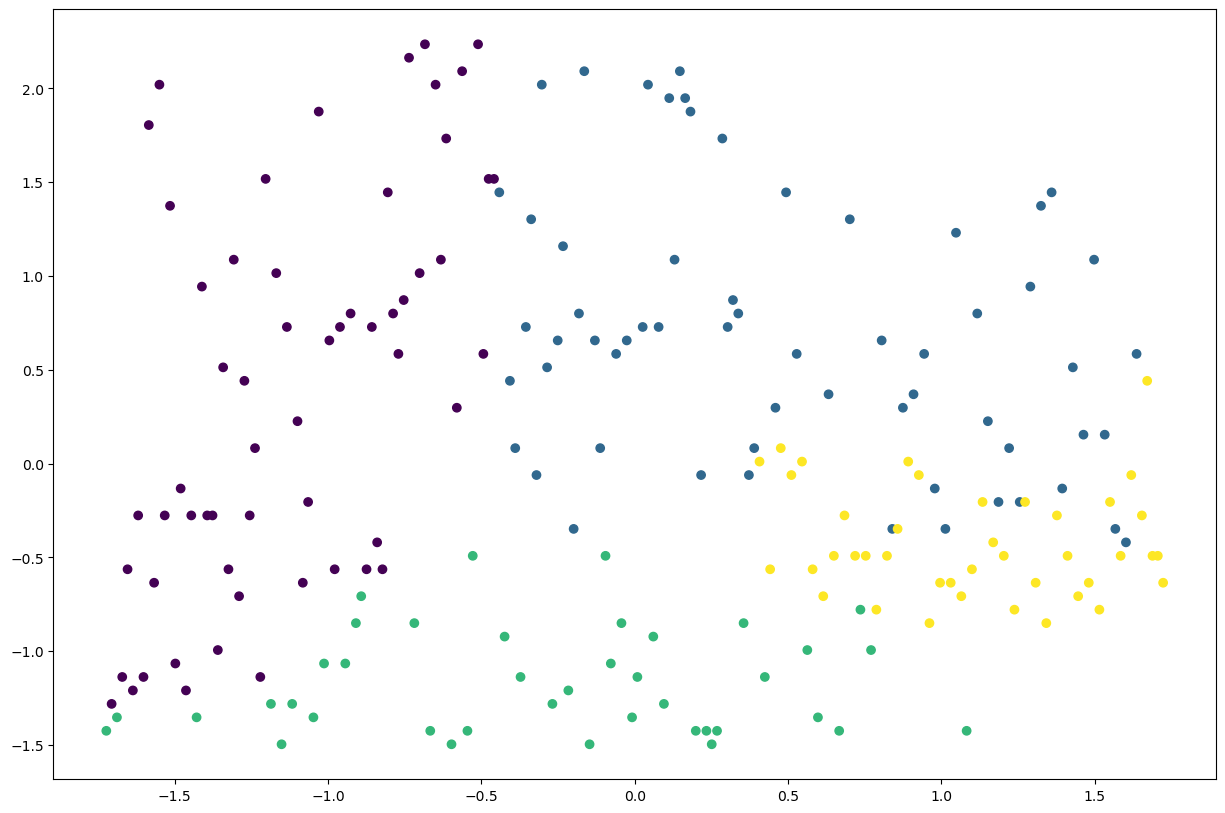

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(x[:,0],x[:,1],c=P)
plt.show()